In [1]:
import tensorflow as tf
import numpy as np
import os
import cv2
from tqdm import tqdm
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras import regularizers



In [2]:
from os import listdir
from os.path import isfile, join

In [3]:
width = 160
height = 120
trainpath = 'train/'
testpath = 'test/'
subdirs = [os.path.join(trainpath, d) for d in os.listdir(trainpath) if os.path.isdir(os.path.join(trainpath, d))]
num_classes = len(subdirs)
trainImg = [trainpath+f for f in listdir(trainpath) if listdir(join(trainpath, f))]
testImg = [testpath+f for f in listdir(testpath) if listdir(join(testpath, f))]

In [4]:
def imgdata(path):
    raw_imgs = []
    labels = []
    
    label_names = [d.split(os.sep)[-1] for d in path]
    label_mapping = {label: [i == j for j in range(len(label_names))] for i, label in enumerate(label_names)}
    
    for image_path in path:
        for item in tqdm(os.listdir(image_path)):
            file = os.path.join(image_path, item)
            if True:
                img = cv2.imread(file, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (height, width))
                raw_imgs.append(img)
                
                label = image_path.split(os.sep)[-1]
                labels.append(label_mapping[label])
    
    return raw_imgs, labels


In [5]:
x_train, y_train = imgdata(trainImg)
x_test, y_test = imgdata(testImg)

100%|██████████| 40/40 [00:03<00:00, 11.10it/s]


In [6]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = x_train.astype ('float32')
x_test = x_test.astype ('float32')
x_train /= 255
x_test /= 255

In [7]:
x_train.shape, y_train.shape

((480, 160, 120, 3), (480, 3))

In [8]:
model = keras.Sequential([
        keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(width, height, 3)),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(128, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(16),
        # keras.layers.Dropout(0.25),
        keras.layers.Flatten(),
        keras.layers.Dense(num_classes, activation='softmax')
])
# model = keras.Sequential([
#     keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(width, height, 3)),
#     keras.layers.MaxPooling2D(pool_size=(2, 2)),
#     keras.layers.Conv2D(128, (3, 3), activation='relu'),
#     keras.layers.MaxPooling2D(pool_size=(2, 2)),
#     keras.layers.Dropout(0.25),
#     keras.layers.Dense(16, activation='relu'),
#     keras.layers.Dropout(0.25),
#     keras.layers.Flatten(),
#     keras.layers.Dense(num_classes, activation='softmax')
# ])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 158, 118, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 79, 59, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 77, 57, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 38, 28, 128)       0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 38, 28, 128)       0         
                                                                 
 dense (Dense)               (None, 38, 28, 16)        2

In [10]:
model.compile(optimizer=keras.optimizers.RMSprop(lr=0.0001), loss='binary_crossentropy', metrics = ['accuracy'])
batch_size = 32
epochs = 10

In [11]:
history = model.fit(x_train, y_train ,batch_size=batch_size, epochs=epochs ,validation_data=(x_test, y_test))

Epoch 1/10
15/15 [==============================] - 11s 740ms/step - loss: 0.8764 - accuracy: 0.4250 - val_loss: 0.5045 - val_accuracy: 0.5833
Epoch 2/10
15/15 [==============================] - 11s 749ms/step - loss: 0.4801 - accuracy: 0.6542 - val_loss: 0.3459 - val_accuracy: 0.7167
Epoch 3/10
15/15 [==============================] - 11s 758ms/step - loss: 0.3319 - accuracy: 0.7958 - val_loss: 0.3674 - val_accuracy: 0.8667
Epoch 4/10
15/15 [==============================] - 12s 825ms/step - loss: 0.2503 - accuracy: 0.8771 - val_loss: 0.2232 - val_accuracy: 0.8583
Epoch 5/10
15/15 [==============================] - 12s 809ms/step - loss: 0.1825 - accuracy: 0.8938 - val_loss: 0.1280 - val_accuracy: 0.9250
Epoch 6/10
15/15 [==============================] - 12s 809ms/step - loss: 0.2061 - accuracy: 0.9000 - val_loss: 0.1279 - val_accuracy: 0.9250
Epoch 7/10
15/15 [==============================] - 12s 816ms/step - loss: 0.1294 - accuracy: 0.9250 - val_loss: 0.1686 - val_accuracy: 0.9083

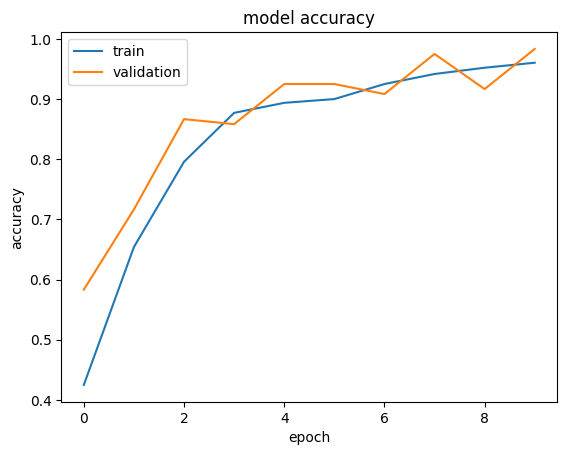

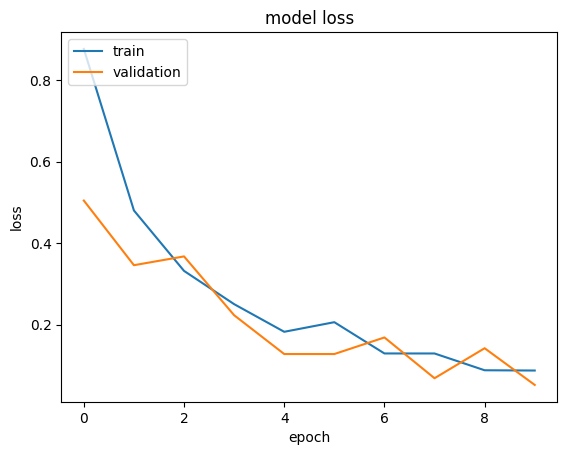

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()
# 'Loss'
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()


1/1 [==============================] - 0s 102ms/step
{'Etlingera elatior': 1.0, 'Euphobia hirta L': 1.7846782e-09, 'Leucas aspera': 1.3186155e-12}
real:IMG_20230803_065257.jpg
predict:Etlingera elatior


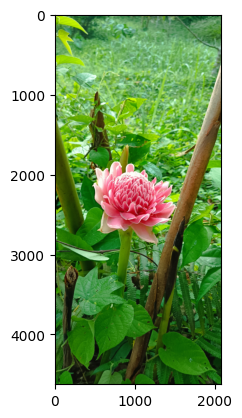

1/1 [==============================] - 0s 31ms/step
{'Etlingera elatior': 0.9963911, 'Euphobia hirta L': 1.07920905e-05, 'Leucas aspera': 0.003598098}
real:IMG_20230210_090648.jpg
predict:Etlingera elatior


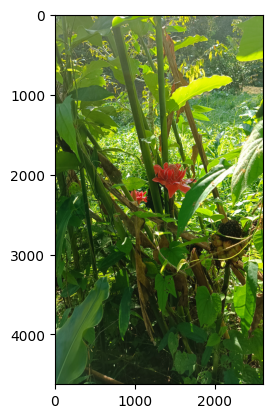

1/1 [==============================] - 0s 29ms/step
{'Etlingera elatior': 1.0, 'Euphobia hirta L': 7.896501e-11, 'Leucas aspera': 1.4258926e-10}
real:IMG_20230210_090557.jpg
predict:Etlingera elatior


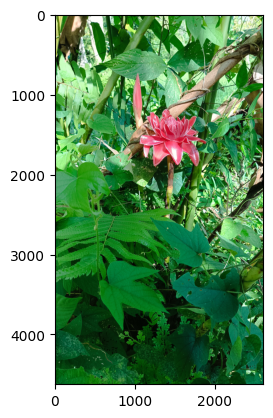

1/1 [==============================] - 0s 24ms/step
{'Etlingera elatior': 0.9999994, 'Euphobia hirta L': 5.798507e-07, 'Leucas aspera': 1.1084995e-12}
real:IMG_20230803_064419.jpg
predict:Etlingera elatior


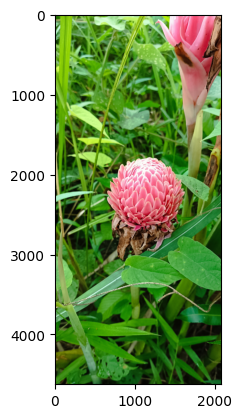

1/1 [==============================] - 0s 24ms/step
{'Etlingera elatior': 1.0, 'Euphobia hirta L': 2.1371787e-16, 'Leucas aspera': 7.479364e-19}
real:IMG_20230210_090532.jpg
predict:Etlingera elatior


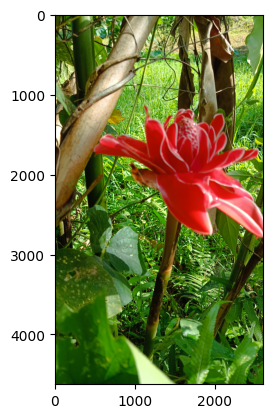

1/1 [==============================] - 0s 28ms/step
{'Etlingera elatior': 1.0, 'Euphobia hirta L': 3.745134e-15, 'Leucas aspera': 1.4784764e-19}
real:IMG_20230803_064634.jpg
predict:Etlingera elatior


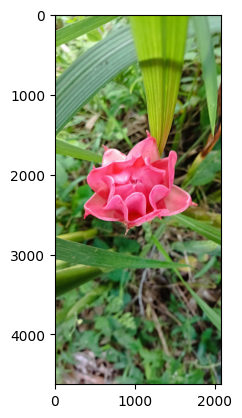

1/1 [==============================] - 0s 29ms/step
{'Etlingera elatior': 0.9998118, 'Euphobia hirta L': 0.00018813921, 'Leucas aspera': 2.6630982e-09}
real:IMG_20230803_065010.jpg
predict:Etlingera elatior


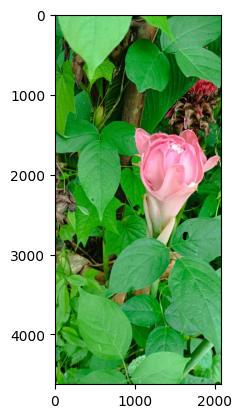

1/1 [==============================] - 0s 26ms/step
{'Etlingera elatior': 1.0, 'Euphobia hirta L': 1.2251289e-09, 'Leucas aspera': 3.629805e-11}
real:IMG_20230210_090411.jpg
predict:Etlingera elatior


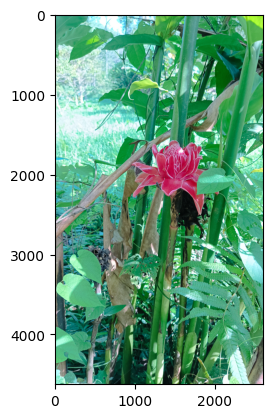

1/1 [==============================] - 0s 25ms/step
{'Etlingera elatior': 1.0, 'Euphobia hirta L': 9.479999e-14, 'Leucas aspera': 1.4956439e-16}
real:IMG_20230803_064559.jpg
predict:Etlingera elatior


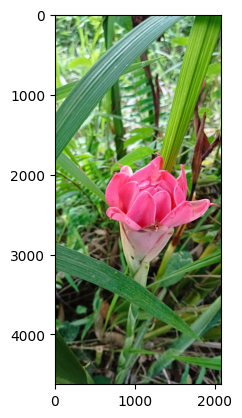

1/1 [==============================] - 0s 25ms/step
{'Etlingera elatior': 0.99972695, 'Euphobia hirta L': 0.00017987825, 'Leucas aspera': 9.324257e-05}
real:IMG_20230210_090649.jpg
predict:Etlingera elatior


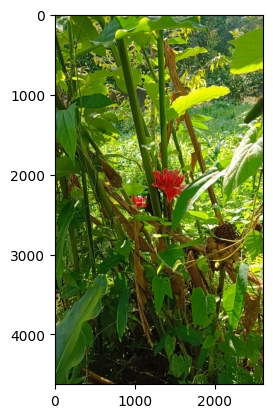

1/1 [==============================] - 0s 23ms/step
{'Etlingera elatior': 3.2216788e-06, 'Euphobia hirta L': 0.9947286, 'Leucas aspera': 0.0052681593}
real:IMG_20230803_083931.jpg
predict:Euphobia hirta L


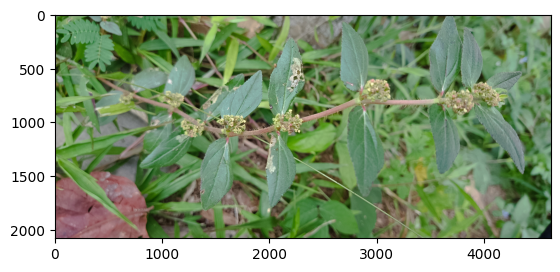

1/1 [==============================] - 0s 24ms/step
{'Etlingera elatior': 5.6505996e-05, 'Euphobia hirta L': 0.9995122, 'Leucas aspera': 0.00043138195}
real:IMG_20230803_083855.jpg
predict:Euphobia hirta L


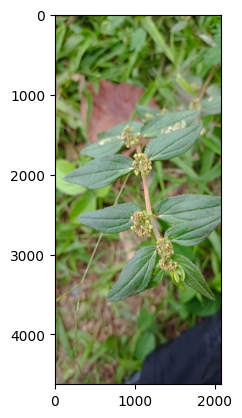

1/1 [==============================] - 0s 70ms/step
{'Etlingera elatior': 6.1729247e-07, 'Euphobia hirta L': 0.99999166, 'Leucas aspera': 7.7740615e-06}
real:IMG_20230806_111853.jpg
predict:Euphobia hirta L


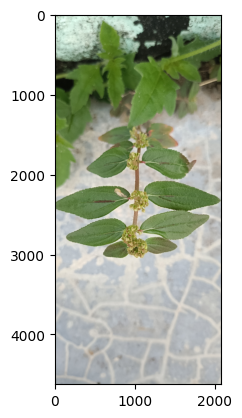

1/1 [==============================] - 0s 70ms/step
{'Etlingera elatior': 3.8121598e-07, 'Euphobia hirta L': 0.99999607, 'Leucas aspera': 3.6002548e-06}
real:IMG_20230803_083902.jpg
predict:Euphobia hirta L


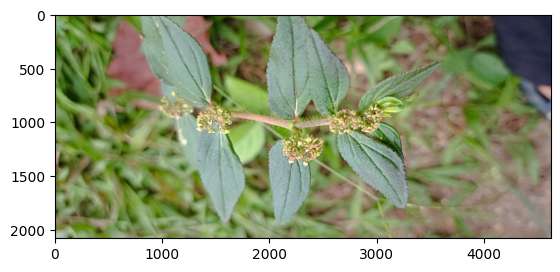

1/1 [==============================] - 0s 69ms/step
{'Etlingera elatior': 0.0014794618, 'Euphobia hirta L': 0.9734909, 'Leucas aspera': 0.025029618}
real:IMG_20230806_093742.jpg
predict:Euphobia hirta L


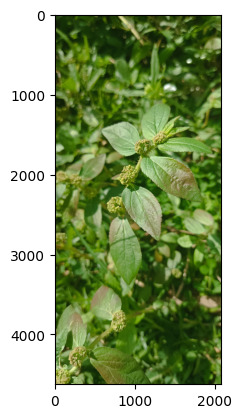

1/1 [==============================] - 0s 67ms/step
{'Etlingera elatior': 6.0406693e-09, 'Euphobia hirta L': 0.9999888, 'Leucas aspera': 1.1191574e-05}
real:IMG_20230712_115429.jpg
predict:Euphobia hirta L


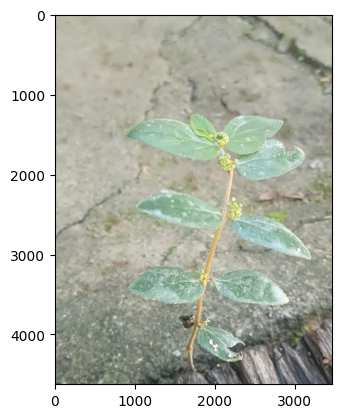

1/1 [==============================] - 0s 68ms/step
{'Etlingera elatior': 3.0980158e-07, 'Euphobia hirta L': 0.99942553, 'Leucas aspera': 0.0005741826}
real:IMG_20230806_111923.jpg
predict:Euphobia hirta L


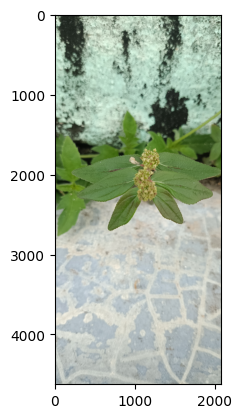

1/1 [==============================] - 0s 62ms/step
{'Etlingera elatior': 2.547487e-05, 'Euphobia hirta L': 0.99996746, 'Leucas aspera': 7.0197348e-06}
real:IMG_20230806_105551.jpg
predict:Euphobia hirta L


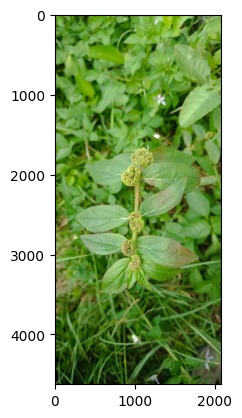

1/1 [==============================] - 0s 64ms/step
{'Etlingera elatior': 3.6782673e-08, 'Euphobia hirta L': 0.9999995, 'Leucas aspera': 4.8574833e-07}
real:IMG_20230311_083421.jpg
predict:Euphobia hirta L


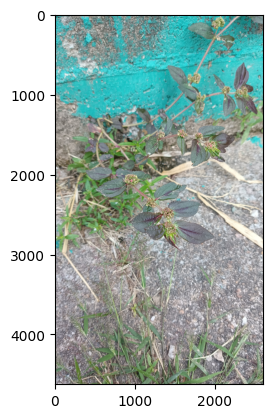

1/1 [==============================] - 0s 66ms/step
{'Etlingera elatior': 3.4815228e-05, 'Euphobia hirta L': 0.9998584, 'Leucas aspera': 0.000106808955}
real:IMG_20230806_094046.jpg
predict:Euphobia hirta L


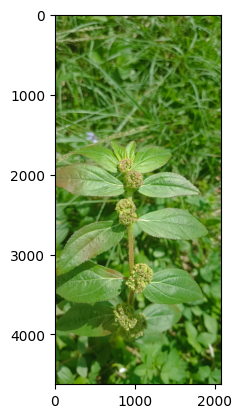

1/1 [==============================] - 0s 58ms/step
{'Etlingera elatior': 1.0197661e-05, 'Euphobia hirta L': 0.00013593303, 'Leucas aspera': 0.99985385}
real:IMG_20230807_072956.jpg
predict:Leucas aspera


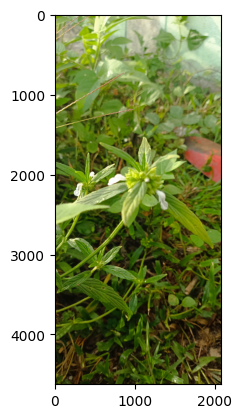

1/1 [==============================] - 0s 74ms/step
{'Etlingera elatior': 3.935921e-08, 'Euphobia hirta L': 8.177116e-06, 'Leucas aspera': 0.9999918}
real:IMG_20230807_073911.jpg
predict:Leucas aspera


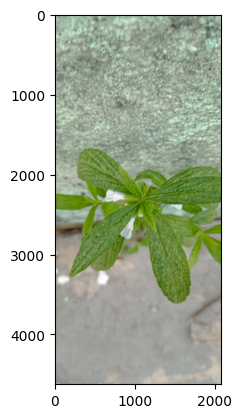

1/1 [==============================] - 0s 66ms/step
{'Etlingera elatior': 5.53785e-08, 'Euphobia hirta L': 2.522643e-07, 'Leucas aspera': 0.99999964}
real:IMG_20230807_075301.jpg
predict:Leucas aspera


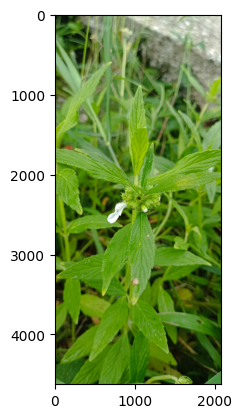

1/1 [==============================] - 0s 68ms/step
{'Etlingera elatior': 4.663064e-09, 'Euphobia hirta L': 1.2140752e-06, 'Leucas aspera': 0.9999988}
real:IMG_20230807_074841.jpg
predict:Leucas aspera


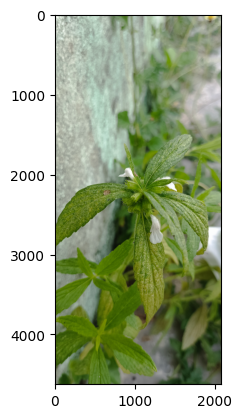

1/1 [==============================] - 0s 70ms/step
{'Etlingera elatior': 2.069268e-05, 'Euphobia hirta L': 4.5375204e-05, 'Leucas aspera': 0.99993396}
real:IMG_20230807_082729.jpg
predict:Leucas aspera


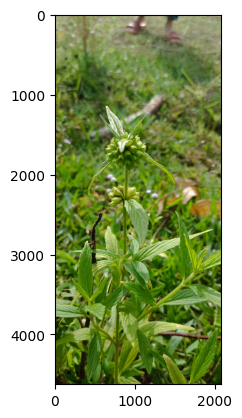

1/1 [==============================] - 0s 68ms/step
{'Etlingera elatior': 0.00016362016, 'Euphobia hirta L': 0.020225592, 'Leucas aspera': 0.9796108}
real:IMG_20230807_082651.jpg
predict:Leucas aspera


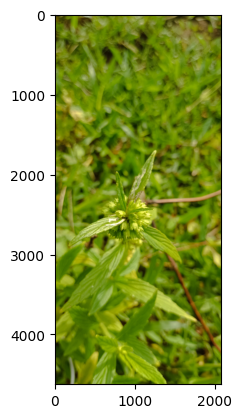

1/1 [==============================] - 0s 67ms/step
{'Etlingera elatior': 1.6759928e-10, 'Euphobia hirta L': 1.1463867e-09, 'Leucas aspera': 1.0}
real:IMG_20230807_080602.jpg
predict:Leucas aspera


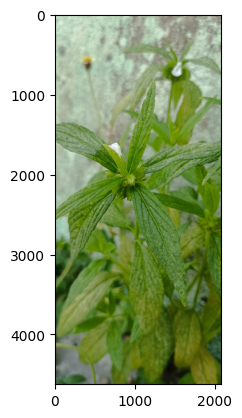

1/1 [==============================] - 0s 66ms/step
{'Etlingera elatior': 2.1687635e-10, 'Euphobia hirta L': 5.354231e-11, 'Leucas aspera': 1.0}
real:IMG_20230807_074925.jpg
predict:Leucas aspera


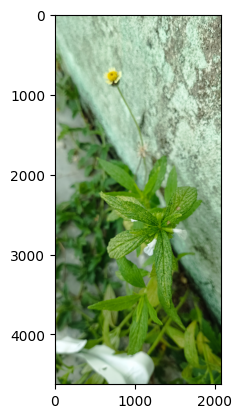

1/1 [==============================] - 0s 68ms/step
{'Etlingera elatior': 8.1653684e-10, 'Euphobia hirta L': 9.272773e-09, 'Leucas aspera': 1.0}
real:IMG_20230807_074340.jpg
predict:Leucas aspera


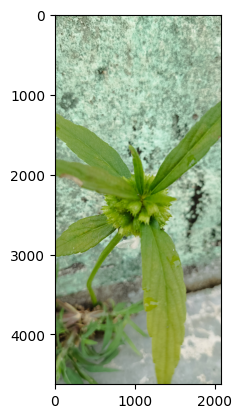

1/1 [==============================] - 0s 69ms/step
{'Etlingera elatior': 3.4231104e-07, 'Euphobia hirta L': 2.2034676e-05, 'Leucas aspera': 0.9999776}
real:IMG_20230807_074928.jpg
predict:Leucas aspera


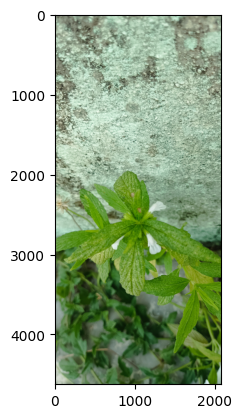

In [13]:
import random

testpath = 'test/'
testImg = [testpath + f for f in listdir(testpath) if listdir(join(testpath, f))]
class_names = [d.split(os.sep)[-1] for d in testImg]
for image_path in testImg:
    images = os.listdir(image_path)
    random.shuffle(images)
    selected_images = images[:10]
    for item in selected_images:
        file = os.path.join(image_path, item)
        if item.split('.')[0] != "":
            img = cv2.imread(file, cv2.COLOR_BGR2RGB)
            ori = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (height, width))
            rimg = np.array(img)
            rimg = rimg.astype('float32')
            rimg /= 255
            rimg = np.reshape(rimg, (1, width, height, 3))
            predict = model.predict(rimg)
            result = class_names[np.argmax(predict)]
            predict_dict = dict(zip([name.split('/')[-1] for name in class_names], predict[0]))
            if np.max(predict) <= 0.2:
                result = "Undefined"
            print(predict_dict)
            print('real:' + str(item))
            print('predict:' + str(result.split('/')[-1]))
            plt.imshow(ori)
            plt.show()




In [14]:
print (image_path)

test/Leucas aspera


In [15]:
import pickle
pickle.dump(model, open('train/model.pkl', 'wb'))
